![Cat and Dog](Cat%20and%20Dog.jpg)



## Cats vs Dogs: The Great Pet Debate 🐱🐶

### 📖 Background

You and your friend have debated for years whether cats or dogs make more popular pets. You finally decide to settle the score by analyzing pet data across different regions of the UK. Your friend found data on estimated pet populations, average pets per household, and geographic factors across UK postal code areas. It's time to dig into the numbers and settle the cat vs. dog debate! 

### 💾 The data

There are three data files, which contains the data as follows below.

#### The `population_per_postal_code.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `estimated_cat_population` | The estimated cat population for the postal code area |  
| `estimated_dog_population` | The estimated cat population for the postal code area |


#### The `avg_per_household.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `cats_per_household` | The average number of cats per household in the postal code area |  
| `dog_per_household` | The average number of dogs per household in the postal code area |

#### The `postal_code_areas.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `town` | The town/towns which are contained in the postal code area |  
| `county` | The UK county that the postal code area is located in |
| `population` | The population of people in each postal code area |
| `num_households` | The number of households in each postal code area |
| `uk_region` | The region in the UK which the postal code is located in |


***Acknowledgments**: 
Data has been assembled and modified from two different sources: [Animal and Plant Health Agency](https://www.data.gov.uk/search?filters%5Bpublisher%5D=Animal+and+Plant+Health+Agency), [Postcodes](
https://ideal-postcodes.co.uk/guides/postcode-areas).


In [16]:
import pandas as pd
population_raw_data = pd.read_csv('data/population_per_postal_code.csv')
population_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   postal_code               2830 non-null   object
 1   estimated_cat_population  2830 non-null   object
 2   estimated_dog_population  2830 non-null   object
dtypes: object(3)
memory usage: 66.5+ KB


In [17]:
avg_raw_data = pd.read_csv('data/avg_per_household.csv')
avg_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   postcode            2830 non-null   object 
 1   cats_per_household  2830 non-null   float64
 2   dogs_per_household  2830 non-null   float64
dtypes: float64(2), object(1)
memory usage: 66.5+ KB


In [8]:
postcodes_raw_data = pd.read_csv('data/postal_codes_areas.csv')
postcodes_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     3115 non-null   object 
 1   town            3115 non-null   object 
 2   county          3114 non-null   object 
 3   population      2814 non-null   float64
 4   num_households  2814 non-null   float64
 5   uk_region       3079 non-null   object 
dtypes: float64(2), object(4)
memory usage: 146.1+ KB


## Objectives

- Correlation of pet preferences with other variables
- Regional trends of pet preference
- Identify factors associated with higher cat or dog popularity.  


## Preprocessing

In [4]:
import pandas as pd
population_raw_data = pd.read_csv('data/population_per_postal_code.csv')
avg_raw_data = pd.read_csv('data/avg_per_household.csv')
postcodes_raw_data = pd.read_csv('data/postal_codes_areas.csv')

#print(population_raw_data.columns)
#print(avg_raw_data.columns)
#print(postcodes_raw_data.columns)
#The three cv files will be merged together to easen the analysis and n order for pd.merge to work the common column containing the postal code had to be renamed for it to work.
avg_raw_data.rename(columns = {'postcode':'postal_code'}, inplace = True)

joined_dfs= postcodes_raw_data.merge(avg_raw_data,on="postal_code")\
                                .merge(population_raw_data,on="postal_code")
#Upon examining the first few rows it can be seen that the merge has worked but upon running the info method the estimated cat and dog population columns have the wrong datatypes which shall be converted and since the null values are only 96 a very small percentage they shall be dropped. 
#joined_dfs.head()
#joined_dfs.info()
cleaned_joined_dfs = joined_dfs.dropna()

cleaned_joined_dfs["estimated_cat_population"]= cleaned_joined_dfs["estimated_cat_population"].str.replace(",","").astype("float")

cleaned_joined_dfs["estimated_dog_population"]= cleaned_joined_dfs["estimated_dog_population"].str.replace(",","").astype("float")

#cleaned_joined_dfs.dtypes



## Relationships among the variables

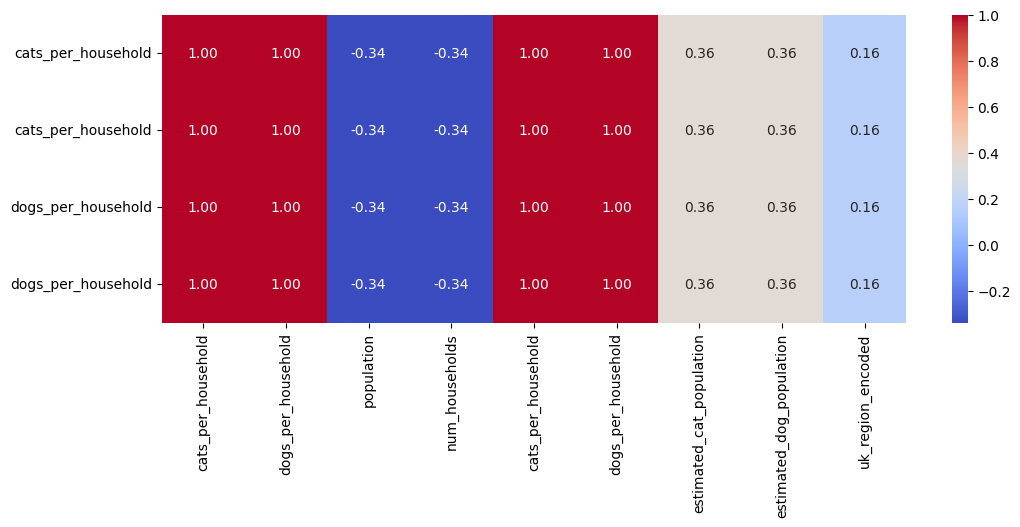

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'uk_region' column
cleaned_joined_dfs['uk_region_encoded'] = label_encoder.fit_transform(cleaned_joined_dfs['uk_region'])

# Selecting only the columns of interest
columns_of_interest = ['cats_per_household', 'dogs_per_household'] + [col for col in cleaned_joined_dfs.columns if cleaned_joined_dfs[col].dtype != 'object']
filtered_df = cleaned_joined_dfs[columns_of_interest]

# Calculating correlation matrix for the filtered dataframe
corr_matrix = filtered_df.corr().loc[['cats_per_household', 'dogs_per_household'], :]

plt.figure(figsize=(12, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Based on the correlation values provided, we can interpret the strength of relationships among the variables as follows:

1. The relationship between `num_households` and both `cats_per_household` and `dogs_per_household` is weak and negative, with a correlation value of -0.34. This suggests that as the number of households increases, the number of cats and dogs per household slightly decreases, but the relationship is not strong.

2. The `estimated_cat_population` and `estimated_dog_population` have a weak to moderate positive correlation with `cats_per_household` and `dogs_per_household`, with a value of 0.36. This indicates that as the estimated populations of cats and dogs increase, the number of cats and dogs per household also increases, but the relationship is not very strong.

3. The correlation with `uk_region_encoded` is weak, with a positive value of 0.16. This indicates a very slight positive relationship between the encoded UK region and the variables of interest (`cats_per_household`, `dogs_per_household`, etc.), suggesting that different regions might have slightly different numbers of cats and dogs per household, but the relationship is very weak.

In summary, all mentioned relationships are relatively weak, with none of the correlation values suggesting a strong relationship between the variables.

In [17]:
#The maximun and minimum values have been displayed below. Since the values are too many to be plotted in visulaizations it shall be filtered to show only where the number of pets per household is greater than two.
print(cleaned_joined_dfs["cats_per_household"].min())

print(cleaned_joined_dfs["cats_per_household"].max())

print(cleaned_joined_dfs["dogs_per_household"].min())

print(cleaned_joined_dfs["dogs_per_household"].max())

0.0
5.212125539
0.0
5.977375145


## Factor One: UK Region

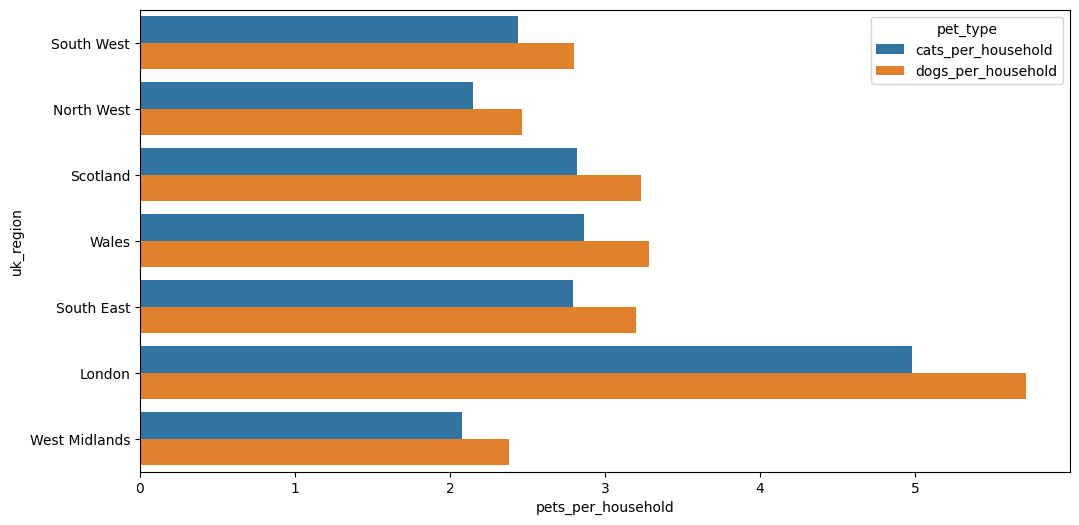

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filter_criteria = ((cleaned_joined_dfs['cats_per_household'] > 2.0)&(cleaned_joined_dfs['cats_per_household'] > 2.0))
filtered_df = cleaned_joined_dfs.loc[filter_criteria]
filtered_df.head()
# Melting the dataframe to have a long format suitable for sns.barplot with both cats and dogs data
filtered_df_melted = pd.melt(filtered_df, id_vars=['postal_code', 'town', 'county', 'population', 'num_households', 'uk_region'], 
                             value_vars=['cats_per_household', 'dogs_per_household'], 
                             var_name='pet_type', value_name='pets_per_household')

plt.figure(figsize=(12, 6))
sns.barplot(y="uk_region", x="pets_per_household", hue="pet_type", data=filtered_df_melted,ci=None)
plt.show()

London is the leading region where both pets are popular but it can also be seen that dogs take the majority of popularity among all regions.

## Factor Two: Estimated Pet populations

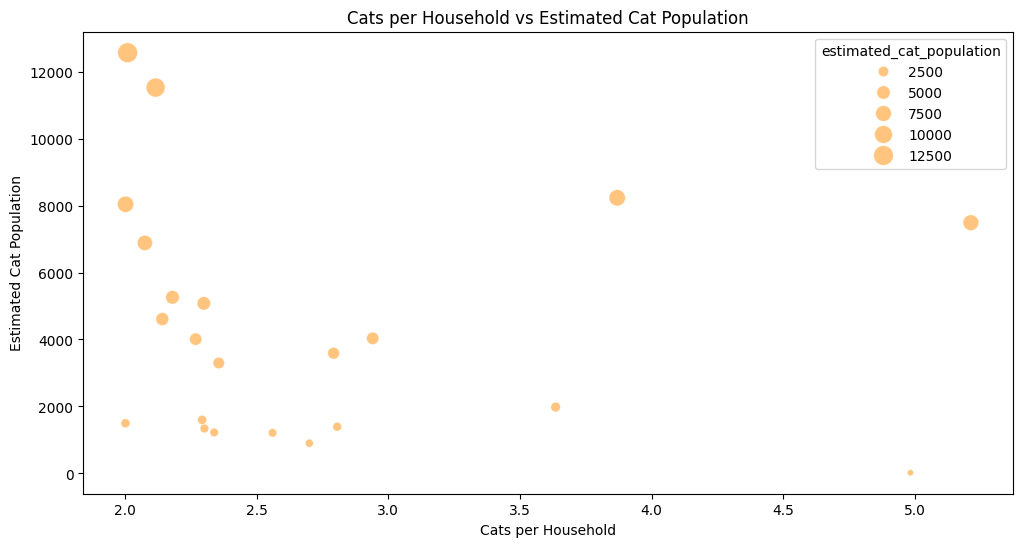

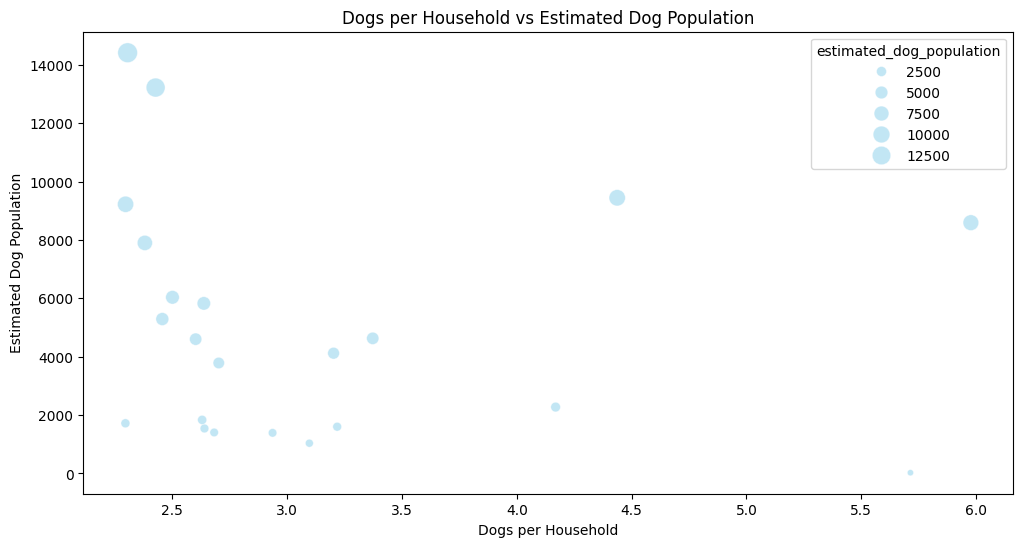

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preparing the data for plotting
filter_criteria = ((cleaned_joined_dfs['cats_per_household'] > 2.0)&(cleaned_joined_dfs['cats_per_household'] > 2.0))
filtered_df = cleaned_joined_dfs.loc[filter_criteria]

# Cats per Household vs Estimated Cat Population
plt.figure(figsize=(12, 6))
sns.scatterplot(x="cats_per_household", y="estimated_cat_population", size="estimated_cat_population",
                sizes=(20, 200), data=filtered_df, alpha=0.5, legend=True,color="darkorange")
plt.xlabel("Cats per Household")
plt.ylabel("Estimated Cat Population")
plt.title("Cats per Household vs Estimated Cat Population")

plt.show()

# Dogs per Household vs Estimated Dog Population
plt.figure(figsize=(12, 6))
sns.scatterplot(x="dogs_per_household", y="estimated_dog_population", size="estimated_dog_population",
                sizes=(20, 200), data=filtered_df, alpha=0.5, legend=True,color="skyblue")
plt.xlabel("Dogs per Household")
plt.ylabel("Estimated Dog Population")
plt.title("Dogs per Household vs Estimated Dog Population")
plt.show()

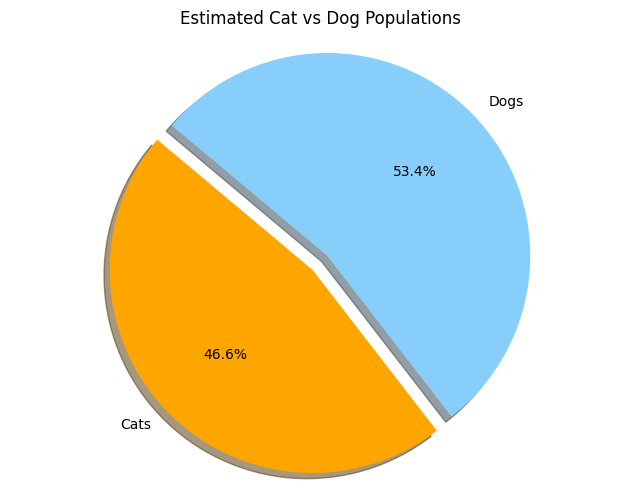

In [48]:
import matplotlib.pyplot as plt

# Summing up the total estimated populations
total_cat_population = filtered_df["estimated_cat_population"].sum()
total_dog_population = filtered_df["estimated_dog_population"].sum()

# Data to plot
labels = 'Cats', 'Dogs'
sizes = [total_cat_population, total_dog_population]
colors = ['orange', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Estimated Cat vs Dog Populations')
plt.show()

As the respective the number of cats per household increase so does the estimated population for cats in the area which is the same too for dogs but also the estimated dog population seems to be higher than for cats.

## Factor Three: Number of households

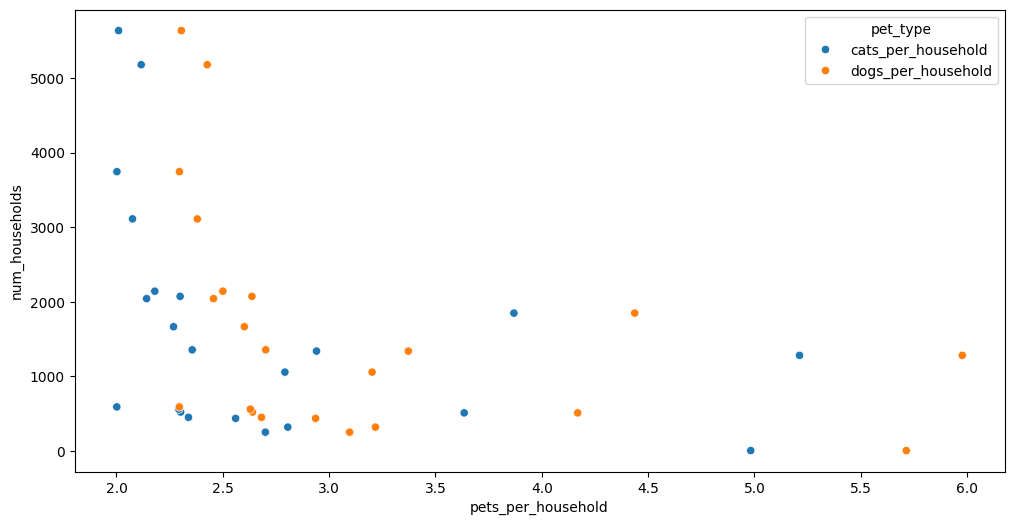

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filter_criteria = ((cleaned_joined_dfs['cats_per_household'] > 2.0)&(cleaned_joined_dfs['cats_per_household'] > 2.0))
filtered_df = cleaned_joined_dfs.loc[filter_criteria]
filtered_df.head()
# Melting the dataframe to have a long format suitable for sns.barplot with both cats and dogs data
filtered_df_melted = pd.melt(filtered_df, id_vars=['postal_code', 'town', 'county', 'population', 'num_households', 'uk_region'], 
                             value_vars=['cats_per_household', 'dogs_per_household'], 
                             var_name='pet_type', value_name='pets_per_household')

plt.figure(figsize=(12, 6))
sns.scatterplot(y="num_households",x="pets_per_household",hue="pet_type", data=filtered_df_melted)
plt.show()

As the number of household increases the number of pets per household reduces.

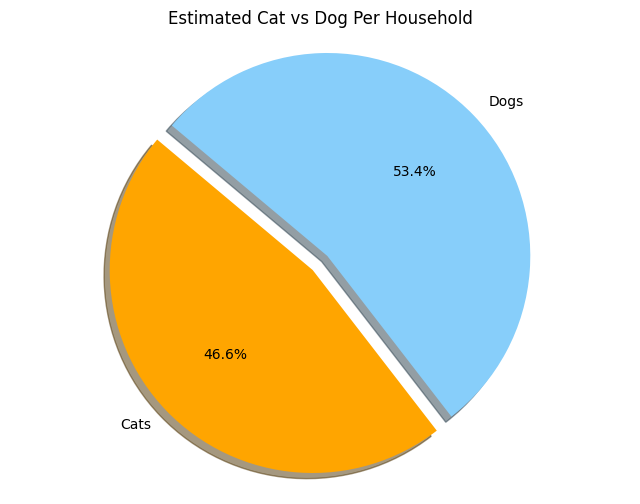

In [49]:
import matplotlib.pyplot as plt

# Summing up the total estimated populations
avg_cat_per_hse = filtered_df["cats_per_household"].mean()
avg_dog_per_hse = filtered_df["dogs_per_household"].mean()

# Data to plot
labels = 'Cats', 'Dogs'
sizes = [avg_cat_per_hse, avg_dog_per_hse]
colors = ['orange', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Estimated Cat vs Dog Per Household')
plt.show()

The number of dogs per household is higher than that of cats.

## Factor Four: Population of people

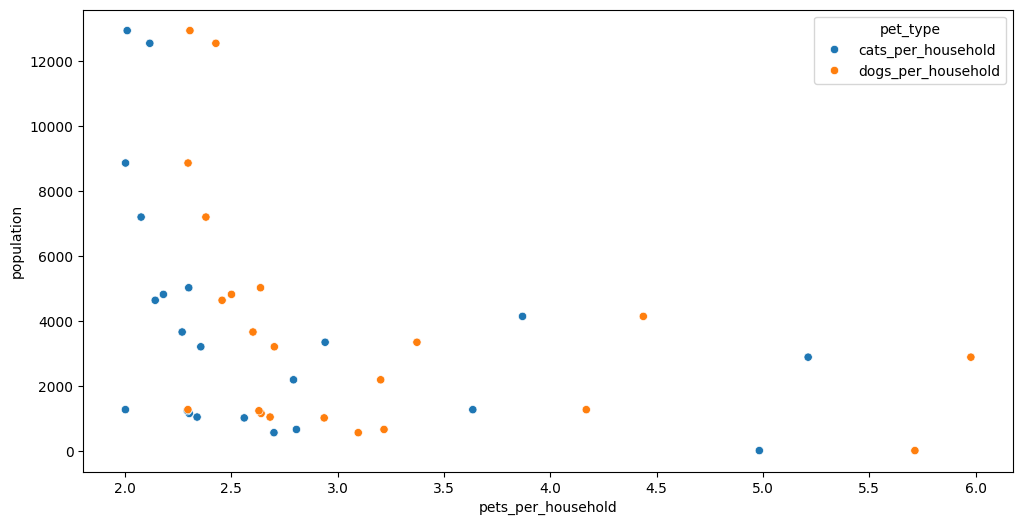

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filter_criteria = ((cleaned_joined_dfs['cats_per_household'] > 2.0)&(cleaned_joined_dfs['cats_per_household'] > 2.0))
filtered_df = cleaned_joined_dfs.loc[filter_criteria]
filtered_df.head()
# Melting the dataframe to have a long format suitable for sns.barplot with both cats and dogs data
filtered_df_melted = pd.melt(filtered_df, id_vars=['postal_code', 'town', 'county', 'population', 'num_households', 'uk_region'], 
                             value_vars=['cats_per_household', 'dogs_per_household'], 
                             var_name='pet_type', value_name='pets_per_household')

plt.figure(figsize=(12, 6))
sns.scatterplot(y="population",x="pets_per_household",hue="pet_type", data=filtered_df_melted)
plt.show()

As the respective the number of pets per household increase, population for people reduces.

In [56]:
display(filtered_df.sort_values(by="population", ascending=False))

,postal_code,town,county,population,num_households,uk_region,cats_per_household,dogs_per_household,estimated_cat_population,estimated_dog_population,uk_region_encoded
1299,LA6,"Arkholme, Cantsfield, Casterton, Ingleton, Ire...",Lancaster,12941.0,5637.0,North West,2.009818,2.304902,12567.390000,14412.550000,4
294,BS40,"Chew Valley, Chew Magna, Chew Stoke, Wrington",Bath and North East Somerset,12549.0,5179.0,South West,2.116140,2.426834,11526.620000,13218.970000,7
305,CA6,"Longtown, Bewcastle",Carlisle,8861.0,3744.0,North West,2.002031,2.295971,8040.160000,9220.620000,4
2764,WR15,Tenbury Wells,Worcester,7196.0,3110.0,West Midlands,2.075267,2.379960,6885.740000,7896.710000,9
2188,SA34,Whitland,Carmarthenshire,5019.0,2071.0,Wales,2.299233,2.636809,5079.010000,5824.710000,8
576,DG3,Thornhill,Dumfriesshire,4814.0,2140.0,Scotland,2.180125,2.500213,5260.640000,6033.010000,5
577,DG4,Sanquhar,Dumfriesshire,4632.0,2040.0,Scotland,2.141650,2.456089,4610.970000,5287.960000,5
1360,LL23,"Bala, Llandderfel, Llanfor, Llanuwchllyn, Sarnau",Gwynedd,4136.0,1846.0,Wales,3.868963,4.437008,8233.150000,9441.950000,8
128,BA7,Castle Cary,South Somerset,3655.0,1663.0,South West,2.268248,2.601275,4010.260000,4599.050000,7
284,BS28,Wedmore,Somerset,3339.0,1336.0,South West,2.940653,3.372403,4034.580000,4626.940000,7


Upon review of the areas that has the highest population of people the number of dogs per household is higher.

## Summary Conclusion

From the analysis conducted on the dataset, several key findings emerge regarding the distribution and popularity of pets across different regions, with a particular focus on London. The insights drawn from the data can be summarized as follows:

- **Popularity of Pets in London:** London stands out as the region with a significant popularity of pets, particularly dogs, which are more popular than cats across all regions. This indicates a strong cultural or lifestyle preference for dogs in urban areas, possibly due to factors such as living arrangements, parks, and community activities that favor dog ownership.

- **Relationship Between Pets Per Household and Estimated Pet Population:** There is a direct correlation between the number of cats per household and the estimated cat population in the area, a trend that is similarly observed for dogs. However, it is noteworthy that the estimated dog population tends to be higher than that of cats. This could be attributed to larger household sizes or a greater propensity among households to own multiple dogs.

- **Impact of Household Numbers on Pets Per Household:** An interesting trend observed is that as the number of households increases, the number of pets per household decreases. This could suggest that in more densely populated or urbanized areas, where the number of households is higher, space constraints or lifestyle factors may limit the ability or desire of residents to own multiple pets.

- **Pets Per Household vs. Human Population:** A reverse relationship is noted between the number of pets per household and the human population. In areas with higher populations, the number of pets per household tends to decrease. This further supports the notion that urban density and lifestyle factors significantly influence pet ownership patterns.

- **Dogs vs. Cats in High Population Areas:** In areas with the highest human populations, dogs are more prevalent per household than cats. This could reflect a preference or suitability for dog ownership in densely populated areas, possibly due to the social nature of dogs and the availability of communal spaces for exercise and socialization.

In conclusion, the analysis reveals intricate patterns of pet ownership across different regions, with a clear preference for dogs in urban areas like London. The findings highlight how factors such as household density, population size, and regional characteristics influence the popularity and distribution of pets, offering valuable insights for urban planning, pet care industries, and community development strategies.